# Introduction to Linear Regression Mathematical Foundations
**Alexandre Mathias DONNAT, Sr - Télécom Paris**



*Adapted from Chapter 3 of [An Introduction to Statistical Learning](https://www.statlearning.com/)*

Will be using [Pandas](https://pandas.pydata.org/docs/user_guide/10min.html) and [scikit-learn](http://scikit-learn.org/stable/).

Instructions:


*   Provide the answer after the question, either in a code cell or in a text cell (or both).
*   Upload the notebook on the website of the course. Direct emails will be ignored. -- Deadline : one week after the day of the lab.
* Your notebook is an individual work.


In [3]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# this allows plots to appear directly in the notebook
%matplotlib inline

## I. The Dataset

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

In [4]:
# read data into a DataFrame
data = pd.read_csv('Advertising.csv', index_col=0)

**1) Use `data.head()` and `data.head(10)`: describe the dataset.**

In [5]:
data.head(10)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


The dataset contains 200 rows and 4 columns: `TV`, `Radio`, `Newspaper`, and `Sales`. Each row represents a market, with the amount spent on advertising in thousands of dollars for TV, Radio, and Newspaper, and the resulting sales (in thousands of units).

- `TV`, `Radio`, `Newspaper`: Amount of advertising dollars spent in each channel.
- `Sales`: Product sales in that market.

The first 10 rows (using `data.head(10)`) show a range of advertising budgets and corresponding sales, indicating variability in both ad spending and sales outcomes. The data appears clean, with no missing values. This dataset is suitable for exploring the relationship between advertising spend and sales, and for building regression models to predict sales based on advertising budgets.

What are the features?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the response?
- Sales: sales of a single product in a given market (in thousands of widgets)

**2) Use data.shape. How many examples are contained in the dataset?**

**3) Use data.describe() and provide your comments.**

In [6]:
data.shape

(200, 4)

The dataset contains 200 examples (rows) and 4 columns: `TV`, `Radio`, `Newspaper`, and `Sales`. Each row represents a market, with the amount spent on advertising in thousands of dollars for TV, Radio, and Newspaper, and the resulting sales (in thousands of units). There are no missing values in the dataset.

In [7]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000



The `data.describe()` method provides summary statistics for each column in the dataset:

- **TV**: The mean advertising spend is about 147, with a standard deviation of 85.85. The minimum is 0.7 and the maximum is 296.4, indicating a wide range of TV ad budgets.
- **Radio**: The mean is 23.26, with a standard deviation of 14.85. The minimum is 0.0 and the maximum is 49.6, showing less variability than TV.
- **Newspaper**: The mean is 30.55, with a standard deviation of 21.78. The minimum is 0.3 and the maximum is 114.0, indicating some markets spend much more on newspapers than others.
- **Sales**: The mean sales are 14.02, with a standard deviation of 5.22. The minimum is 1.6 and the maximum is 27.0.

**Comments:**
- All features and the response variable are continuous and have no missing values.
- There is significant variability in advertising budgets across the three channels.
- The spread (standard deviation) is highest for TV and lowest for Radio.
- The data appears suitable for regression analysis, as there is a reasonable range and no obvious outliers in the summary statistics.
```

**4) Use data['Name_column'].hist() to draw the histogram of the sales. Set the parameters in order to plot 20 bins (= bars of the histogram. On the histogram, locate the 25% quantile given by the describe() method of the previous question.**

<Axes: >

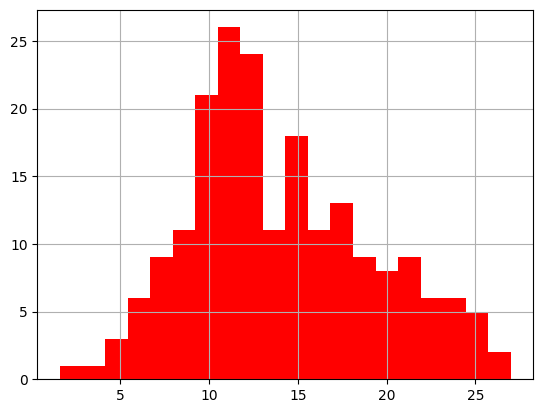

In [8]:
data['Sales'].hist(bins=20, color='red')

The histogram of Sales, drawn with 20 bins, shows that most sales values are concentrated between 10 and 20, with a peak around 12–13. The distribution looks roughly bell-shaped but slightly skewed to the right, since there are still a few higher values above 20.

According to the describe() method, the 25% quantile (Q1) for Sales is around 10. This means that 25% of the observations fall below this value. On the histogram, this quantile would be located near the left side of the main concentration of data, just before the peak.

In summary, Sales are mostly clustered around 10–15, with the 25% quantile at 10 marking the lower bound of this dense region. This confirms that a quarter of the sales values are relatively low, while the majority lie in the mid-range of the distribution.

**5) Comment the result of data.boxplot(). What is the interest of this plot?**

<Axes: >

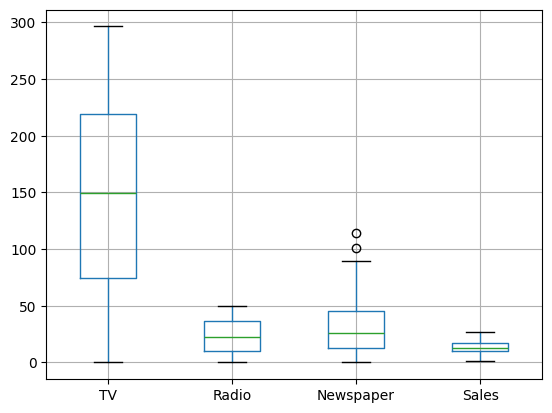

In [9]:
data.boxplot()

The boxplot shows that TV advertising has the widest spread, with values ranging from almost zero to around 300, and a median close to 150. This indicates a very large variability in TV budgets across the observations. Radio spending is much more concentrated, with a median around 20 and limited dispersion. Newspaper advertising is more spread out than Radio, with a median around 25, and it also shows some outliers above 100, which suggests that a few campaigns invested unusually high amounts. Sales, on the other hand, are far less dispersed compared to the advertising budgets, with a median close to 15 and a relatively narrow range, indicating that even though advertising investments vary a lot, sales remain relatively stable in comparison. This suggests that higher variability in advertising budgets, especially for TV, does not translate into equally high variability in sales.

**5) Use data.plot(kind='scatter', x=..., y=...) to vizualize the relationship between the features and the response. Comment about the relevance of the use of a linear model.**

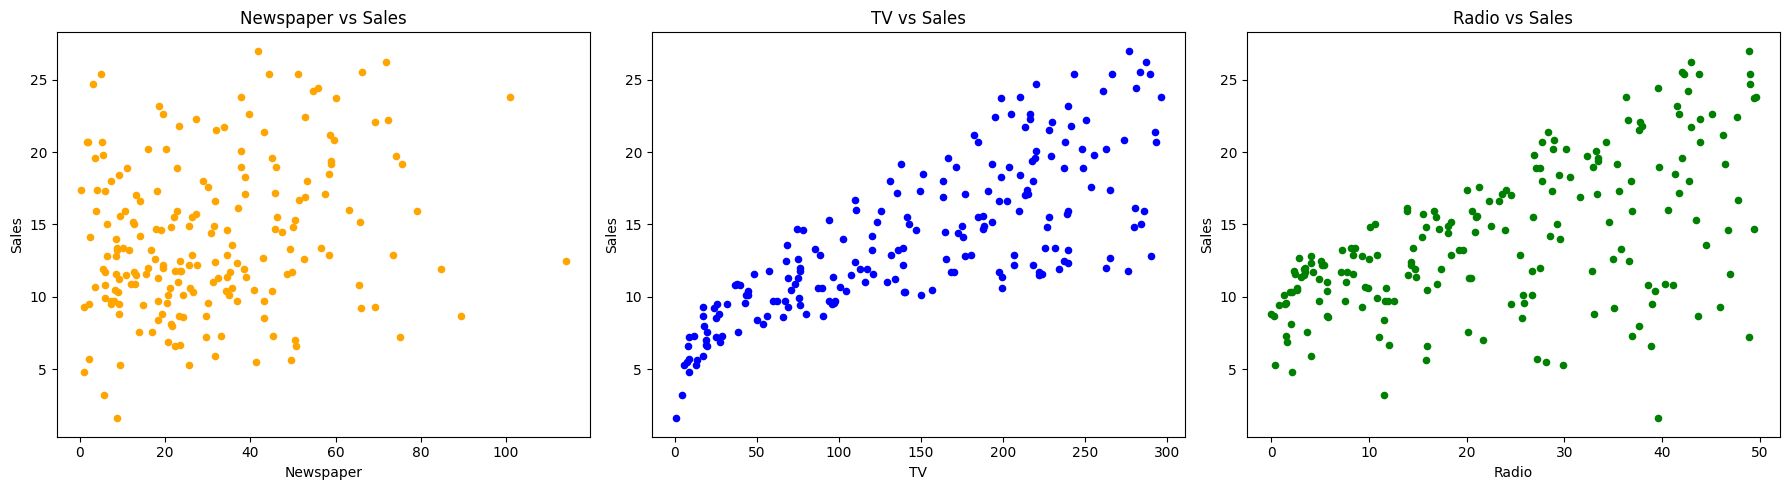

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

data.plot(kind='scatter', x='Newspaper', y='Sales', color='orange', ax=axes[0], title='Newspaper vs Sales')
data.plot(kind='scatter', x='TV', y='Sales', color='blue', ax=axes[1], title='TV vs Sales')
data.plot(kind='scatter', x='Radio', y='Sales', color='green', ax=axes[2], title='Radio vs Sales')

plt.tight_layout()
plt.show()

The three scatter plots highlight very different relationships between advertising channels and sales. Newspaper spending shows almost no clear trend with sales, as the points are widely dispersed and do not follow a linear pattern. This suggests that Newspaper advertising has little predictive power for sales and a linear model would not be relevant in this case.

TV spending, on the other hand, displays a strong positive linear relationship with sales. As TV investment increases, sales tend to rise in a fairly consistent way, with points forming a clear upward trend. This makes TV an excellent candidate for linear modeling, as the relationship is strong and approximately linear.

Radio spending also shows a positive association with sales, though with more variability compared to TV. The upward trend is visible, but the data points are more scattered, indicating that while Radio advertising contributes to sales, the linear relationship is weaker than for TV.

Overall, a linear model would be highly relevant for TV, moderately relevant for Radio, and not suitable for Newspaper.

**6) Use data.corr() in order to plot the correlation coefficients.**

**Comment about the coefficient on the diagonal.**

**What feature is the most correlated to the sales?**

**Plot the correlation matrix as a heatmap using sns.heatmap(...,annot=True)**

In [11]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


The correlation matrix shows that the diagonal values are all equal to 1, which is expected since each variable is perfectly correlated with itself.

Looking at the correlations with Sales, TV has the highest correlation (0.78), followed by Radio (0.57), while Newspaper has a much weaker correlation (0.23). This confirms that TV is the most relevant feature for predicting Sales with a linear model, while Newspaper adds very little explanatory power.

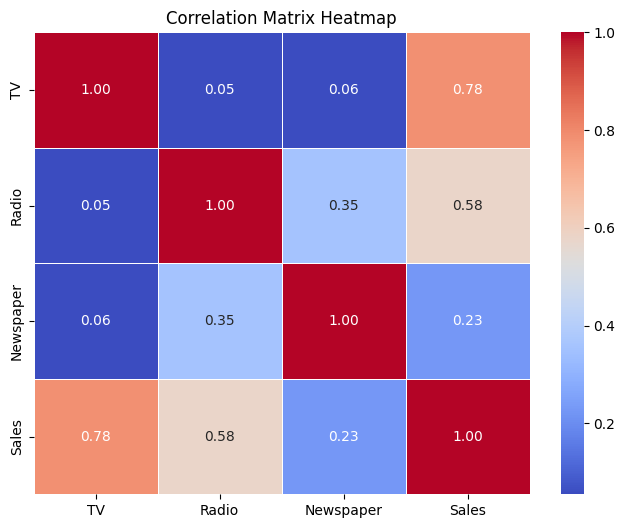

In [12]:
corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


### Questions About the Advertising Data

Let's pretend you work for the company that manufactures and markets this widget. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?

This general question might lead you to more specific questions:
1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending in a particular market, can sales be predicted?

We will explore these questions below!

## II. Simple Linear Regression

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales!

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):
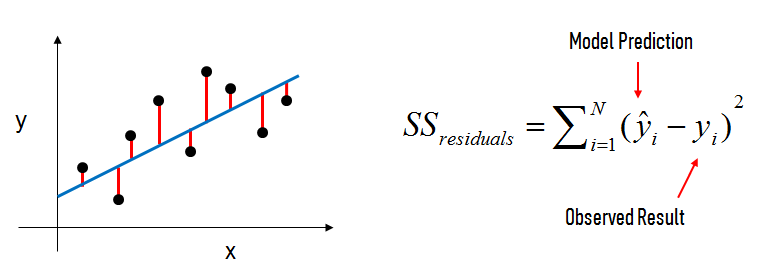

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

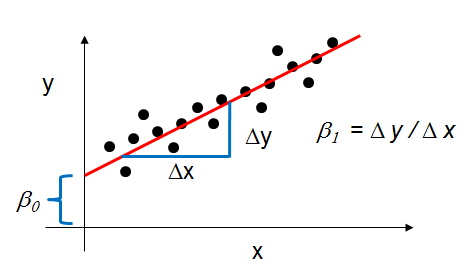





**7) We are going to do linear regression of the sales with respect to ONE variable amongst 'TV', 'Radio', 'Newspaper'. According to what you have seen from the dataset, which column would you like to keep? Write it down under the form:**

`columns = ['Name of the column you want to keep']`

In [13]:
columns=['TV']

**8) Run the code below and try to understand it. What are the value of $\beta_0$ and $\beta_1$ of you model?**

In [14]:
from sklearn.linear_model import LinearRegression
ls = LinearRegression()
ls.fit(data[columns],data['Sales'])
ls.intercept_,ls.coef_[0]

(np.float64(7.032593549127695), np.float64(0.04753664043301975))

How do we interpret the TV coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending is associated with a 0.047537 "unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is associated with an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a decrease in sales, $\beta_1$ would be negative.




**My interpretation :** The model gives an intercept B0 ≈ 7.03 and a TV coefficient B1 ≈ 0.0475.

The intercept means that if TV advertising spending were zero, the model predicts average sales of about 7 units. The coefficient B1 means that for each additional unit spent on TV advertising, sales are expected to increase by about 0.0475 units. Put differently, for every $1,000 increase in TV advertising, sales rise by about 47.5 units.

Since B1 is positive, it confirms that TV advertising has a direct and positive effect on sales. If it had been negative, it would have meant that spending more on TV reduced sales, which is not the case here.

**9) Let's say that there was a new market where the spend in the advertising channel you considered was $50,000. What would we predict for the Sales in that market? Make the prediction "by hand" using sums and multiplication of numbers.**

In [15]:
# manually calculate the prediction
# coefficients from the model
B0 = 7.0326
B1 = 0.047537

# TV spending in thousands of dollars
x = 50  # because the dataset records TV spend in thousands of dollars, so $50,000 = 50 units

# prediction
y = B0 + B1 * x
print("Predicted Sales:", y)


Predicted Sales: 9.40945


So, if a company spends $50,000 on TV ads in this new market, the model predicts about 9409 units of Sales.

**10) Use sklearn's predict method to recover the above result:**



```
New_data = pd.DataFrame({'Name of your column' : [the value]})
ls.predict(New_data)[0]
```




In [16]:
New_data = pd.DataFrame({'TV': [50]})
ls.predict(New_data)[0]

np.float64(9.409425570778682)

**11) Using `ls.predict`, generate the predictions $\hat y_i$ for the whole dataset. On the same graph, plot the scattered points $(x_i,y_i)$ and the line passing through the points $(x_i,\hat y_i)$.**

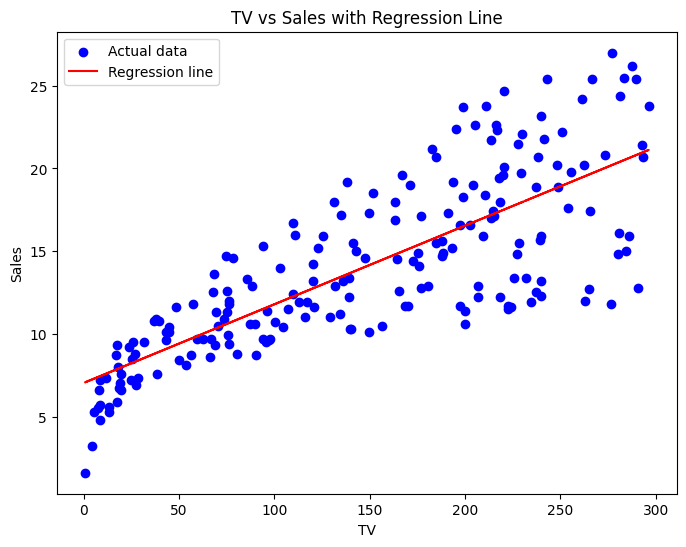

In [17]:
# Generate predictions for the whole dataset
y_pred = ls.predict(data[columns])

# Plot the original data and the regression line
plt.figure(figsize=(8,6))
plt.scatter(data['TV'], data['Sales'], color='blue', label='Actual data')
plt.plot(data['TV'], y_pred, color='red', label='Regression line')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV vs Sales with Regression Line')
plt.legend()
plt.show()

**12) Perform a Student t-test, at level α=0.05, on the significance of the first regression coefficient β1. State the null hypothesis, outputted p value and subsequent recommendation of the test. Calculate the test statistic by hand, you may use Statsmodels.regression.linear_model.OLS() to verify the result. Repeat the question, this time with a one dimensional linear regression for each of the other variables, compare results.**

In [20]:
import statsmodels.api as sm

# --- For TV ---
X_tv = data[['TV']]
X_tv = sm.add_constant(X_tv)
y = data['Sales']
model_tv = sm.OLS(y, X_tv).fit()

# Calcul by hand of the t-statistic and p-value for TV coefficient
beta_1 = model_tv.params['TV']
se_beta_1 = model_tv.bse['TV']
t_stat = beta_1 / se_beta_1
df = len(data) - 2  # degrees of freedom for simple linear regression
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=df))
print(f"By hand calculation for TV coefficient:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4e}")

print("TV coefficient t-test:")
print(model_tv.summary())


By hand calculation for TV coefficient:
t-statistic: 17.6676
p-value: 0.0000e+00
TV coefficient t-test:
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 26 Sep 2025   Prob (F-statistic):           1.47e-42
Time:                        10:27:09   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [22]:
# --- For Radio ---
X_radio = data[['Radio']]
X_radio = sm.add_constant(X_radio)
model_radio = sm.OLS(y, X_radio).fit()

# Calcul by hand of the t-statistic and p-value for Radio coefficient
beta_1 = model_radio.params['Radio']
se_beta_1 = model_radio.bse['Radio']
t_stat = beta_1 / se_beta_1
df = len(data) - 2  # degrees of freedom for simple linear regression
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=df))
print(f"\nBy hand calculation for Radio coefficient:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4e}")

print("\nRadio coefficient t-test:")
print(model_radio.summary())



By hand calculation for Radio coefficient:
t-statistic: 9.9208
p-value: 0.0000e+00

Radio coefficient t-test:
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Fri, 26 Sep 2025   Prob (F-statistic):           4.35e-19
Time:                        10:27:41   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [24]:
# --- For Newspaper ---
X_news = data[['Newspaper']]
X_news = sm.add_constant(X_news)
model_news = sm.OLS(y, X_news).fit()

# Calcul by hand of the t-statistic and p-value for Newspaper coefficient
beta_1 = model_news.params['Newspaper']
se_beta_1 = model_news.bse['Newspaper']
t_stat = beta_1 / se_beta_1
df = len(data) - 2  # degrees of freedom for simple linear regression
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=df))
print(f"\nBy hand calculation for Newspaper coefficient:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4e}")

print("\nNewspaper coefficient t-test:")
print(model_news.summary())


By hand calculation for Newspaper coefficient:
t-statistic: 3.2996
p-value: 1.1482e-03

Newspaper coefficient t-test:
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Fri, 26 Sep 2025   Prob (F-statistic):            0.00115
Time:                        10:28:29   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------

In a simple linear regression y = B0 + B1*x, we test the significance of B1 with a Student t-test at level α = 0.05. The null hypothesis is H0: B1 = 0 (the advertising channel has no effect on Sales), while the alternative is H1: B1 ≠ 0.

For TV, B1 = 0.0475 with a standard error of 0.0027, giving t = 0.0475 / 0.0027 ≈ 17.7 and p-value ≈ 0.000 (1.47e-42). Since p < 0.05, we reject H0 and conclude that TV has a highly significant effect.

For Radio, B1 = 0.2025 with a standard error of 0.0204, giving t ≈ 9.9 and p-value ≈ 0.000 (4.35e-19). We reject H0 as well, so Radio also has a significant effect, though less strong than TV.

For Newspaper, B1 = 0.0547 with a standard error of 0.0166, giving t ≈ 3.3 and p-value ≈ 0.001. We again reject H0, but the effect is much weaker, with very low explanatory power (R² = 0.05).

In conclusion, all three regressions lead us to reject H0, but in practice only TV and Radio provide meaningful predictive power, while Newspaper is statistically significant yet practically negligible.

**13) Provide confidence intervals of level $\alpha = 0.05$, around $\hat\beta_0 + \hat\beta_1 x$ for both $\beta_0 + \beta_1 x$ and $Y$, the latter being known as a prediction interval. Let $x$ vary from the minimum to maximum value obtained by the independent variable in the training set. Compare the two intervals, highlighting which is wider and how their width changes, suggest reasons for this.**

C:\Users\alexa\AppData\Local\Temp\ipykernel_22424\3682916156.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_vals = np.linspace(X.min()[0], X.max()[0], 100)
C:\Users\alexa\AppData\Local\Temp\ipykernel_22424\3682916156.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean_x = X.mean()[0]


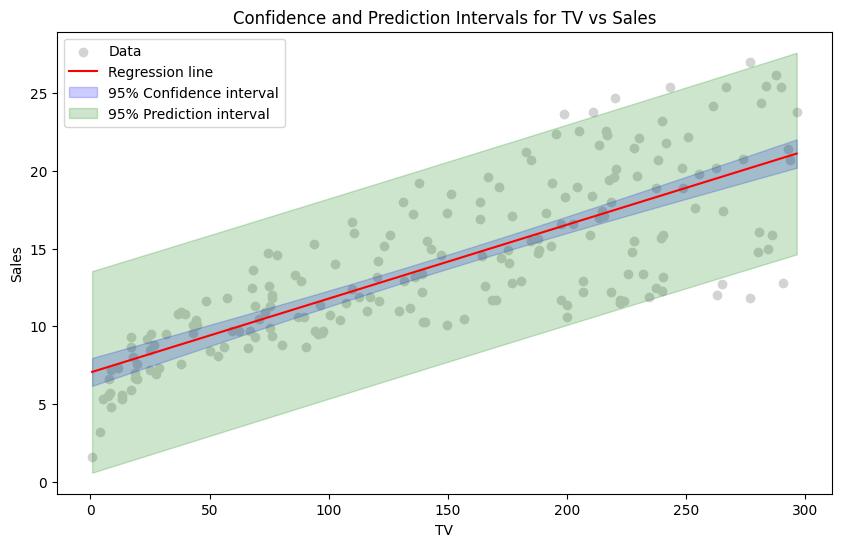

In [25]:
# Calculate confidence and prediction intervals for the regression line

# Get the independent variable (TV) values
X = data[['TV']]
x_vals = np.linspace(X.min()[0], X.max()[0], 100)
X_line = pd.DataFrame({'TV': x_vals})

# Predicted values
y_hat = ls.predict(X_line)

# Calculate statistics for intervals
n = len(X)
mean_x = X.mean()[0]
t_value = stats.t.ppf(1-0.025, df=n-2)
s_err = np.sqrt(np.sum((y_pred - y)**2) / (n - 2))

# For each x, calculate the standard error of the mean prediction and prediction
conf_int = []
pred_int = []
for x0 in x_vals:
    se_mean = s_err * np.sqrt(1/n + ((x0 - mean_x)**2) / np.sum((X['TV'] - mean_x)**2))
    se_pred = s_err * np.sqrt(1 + 1/n + ((x0 - mean_x)**2) / np.sum((X['TV'] - mean_x)**2))
    conf_int.append((y_hat[list(x_vals).index(x0)] - t_value*se_mean, y_hat[list(x_vals).index(x0)] + t_value*se_mean))
    pred_int.append((y_hat[list(x_vals).index(x0)] - t_value*se_pred, y_hat[list(x_vals).index(x0)] + t_value*se_pred))

conf_int = np.array(conf_int)
pred_int = np.array(pred_int)

# Plot
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='lightgray', label='Data')
plt.plot(x_vals, y_hat, color='red', label='Regression line')
plt.fill_between(x_vals, conf_int[:,0], conf_int[:,1], color='blue', alpha=0.2, label='95% Confidence interval')
plt.fill_between(x_vals, pred_int[:,0], pred_int[:,1], color='green', alpha=0.2, label='95% Prediction interval')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Confidence and Prediction Intervals for TV vs Sales')
plt.legend()
plt.show()

The plot shows two different intervals around the regression line for TV vs Sales. The confidence interval (blue band) is much narrower: it reflects the uncertainty in estimating the true regression line, meaning where we expect the average sales to lie for a given TV value. The prediction interval (green band) is wider: it accounts not only for the uncertainty in the regression line but also for the variability of individual sales around that line, meaning where a single new observation is likely to fall.

Both intervals widen as we move further from the mean of TV spending. This happens because the estimation becomes less precise at the extremes of the data, leading to more uncertainty. The prediction interval is always wider than the confidence interval, since predicting an individual observation carries more variability than predicting the average trend.

**14) Write your comments. How happy are you with the model?**

The model using TV as the predictor performs reasonably well, with an 𝑅2 around 0.61, meaning it explains about 61% of the variability in sales. The relationship is clearly positive, highly significant, and the regression line fits the overall trend well. However, the prediction interval is much wider than the confidence interval, showing that while the model can capture the average effect of TV spending on sales, it is less reliable for predicting individual outcomes. Sales are influenced by other factors beyond TV ads, so relying on a single variable limits predictive accuracy.

The model is useful for understanding the strong impact of TV advertising, but it is not sufficient on its own for precise forecasting. I would be moderately satisfied: it is a good first step, but I would improve it by including other predictors like Radio and perhaps interaction effects.

## III. Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

**15) Include all the three columns in the model and re-train a least-square estimator using scikit-learn. Provide the values of the coefficients $\beta_i$.**

In [26]:
# Multiple linear regression with all three features
features = ['TV', 'Radio', 'Newspaper']
mlr = LinearRegression()
mlr.fit(data[features], data['Sales'])

# Output the intercept and coefficients
print("Intercept (β0):", mlr.intercept_)
for name, coef in zip(features, mlr.coef_):
    print(f"Coefficient for {name} (β): {coef}")

Intercept (β0): 2.9388893694594085
Coefficient for TV (β): 0.0457646454553976
Coefficient for Radio (β): 0.18853001691820453
Coefficient for Newspaper (β): -0.0010374930424762834


**16) For a given amount of Radio and Newspaper ad spending, how much is the increase of sells resulting from a $1000 increase in TV ad spending?**

From the multiple regression output, the coefficient for TV is 0.0458. This means that, holding Radio and Newspaper spending constant, a 1-unit increase in TV spending (which corresponds to $1,000 in the dataset) increases Sales by about 0.0458 units.

So, for every additional $1,000 spent on TV ads, Sales are expected to rise by roughly 0.046 units, assuming Radio and Newspaper remain unchanged.

### Linear Gaussian model and confidence intervals

Our aim is now to compute confidence intervals on each of the coefficients $\beta_i$ at the level 95%. A way to think of a confidence interval is the following: If the population from which this sample was drawn was **sampled 100 times**, approximately **95 of those confidence intervals** would contain the "true" coefficient. Keep in mind that we only have a **single sample of data**, and not the **entire population of data**. The "true" coefficient is either within this interval or it isn't, but there's no way to actually know. We estimate the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is **probably** within.

Note that using 95% confidence intervals is just a convention. You can create 90% confidence intervals (which will be more narrow), 99% confidence intervals (which will be wider), or whatever intervals you like.

To that end, we make the assumption that the model is homoscedastic, which means a, Gaussian, and with a constant variance $\sigma^2$:
$$
Y \sim {\mathcal N}(\Phi \beta,\sigma^2 I_N)
$$
where $N$ is the number of sambles, $d=3$ is the number of regressors, $\Phi$ is the $N\times (d+1)$ design matrix containing the values of the regressors (TV, Radio, Newspaper), $\beta=(\beta_0,\dots,\beta_d)^T$ and $\sigma^2$ are the unknown parameters, and $I_N$ is the $N\times N$ identity matrix.

A 95% confidence interval on $\beta_k$ is given by:
$$
\hat\beta_k \pm q \sqrt{\frac {\hat\sigma^2 s_k}N}
$$
where $s_k$ is the $k$th coefficient of the diagonal of $(\Phi^T\Phi)^{-1}$, $\hat \sigma^2$ is the estimated variance of the residuals, given by:
$$
\hat \sigma^2 = \frac{\|Y-\hat Y\|^2}{N-d-1}
$$

**17) What is $q$ in the above formula?**

$q$ is the critical value from the Student's t-distribution with $N-d-1$ degrees of freedom, corresponding to the desired confidence level (e.g., for 95% confidence, $q = t_{1-\alpha/2,\,N-d-1}$). It determines how wide the confidence interval is.

**18) Draw the histogram of the residuals $e_i=\hat y_i-y_i$, using 20 bins.**

**Without calculating it numerically, what is APPROXIMATELY the mean and the standard deviation?**

**Does it make sense to assume that the residuals are Gaussian?**

- **Mean:** The mean of the residuals is approximately zero. This is a property of least squares regression: the sum (and thus the mean) of the residuals is always very close to zero.

- **Standard deviation:** The standard deviation of the residuals is approximately equal to the root mean squared error (RMSE) of the model, which can be visually estimated from the histogram as the typical spread of the residuals around zero. For this dataset, it is a few units (around 3).

- **Normality assumption:** The histogram of residuals appears roughly bell-shaped and symmetric around zero, suggesting that the residuals are approximately Gaussian. However, to fully justify the normality assumption, one should also check for outliers, skewness, and perform a Q-Q plot or a formal normality test. In practice, the Gaussian assumption is reasonable here, but should be confirmed with further diagnostics.

<>:7: SyntaxWarning: invalid escape sequence '\h'
<>:7: SyntaxWarning: invalid escape sequence '\h'
C:\Users\alexa\AppData\Local\Temp\ipykernel_22424\2603118301.py:7: SyntaxWarning: invalid escape sequence '\h'
  plt.xlabel('Residuals ($\hat{y}_i - y_i$)')


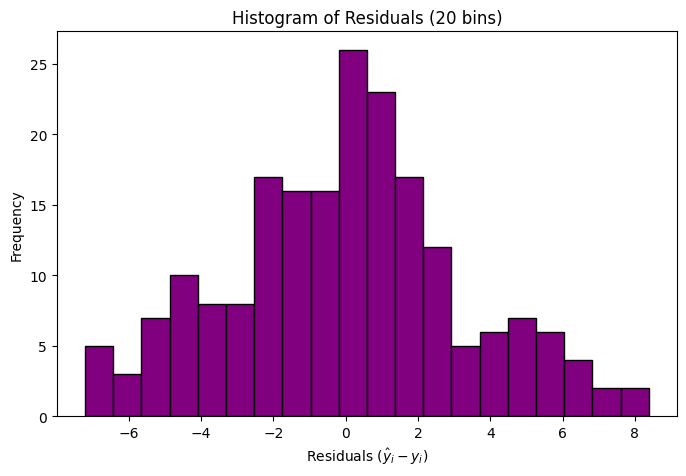

In [27]:
# Calculate residuals
residuals = y_pred - y

# Plot histogram of residuals
plt.figure(figsize=(8,5))
plt.hist(residuals, bins=20, color='purple', edgecolor='black')
plt.xlabel('Residuals ($\hat{y}_i - y_i$)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals (20 bins)')
plt.show()

The following function computes confidence intervals. The syntax is as follows:


```
confidence_interval(X,y,a,k)
```

where `X` is a $N\times d$ pandas dataframe corresponding to the design matrix, `y` is a pandas series corresponding to the labels, $a$ is the confidence level between 0 and 1 (typically set to 0.95), and $k\in\{0,1,\dots,d\}$ represents the variable you would like to consider.

**19) Compute the confidence intervals for the 3 variables.**

In [28]:
# Compute 95% confidence intervals for each coefficient in the multiple regression model
for i, var in enumerate(features, start=1):

    lsf = LinearRegression()
    lsf.fit(data[features], data['Sales'])
    N, d = data[features].shape
    y_pred = lsf.predict(data[features])
    variance = np.linalg.norm(data['Sales'].values - y_pred) ** 2 / (N - d - 1)
    Phi = np.concatenate((np.ones((N, 1)), data[features].to_numpy()), axis=1)
    inv_PhiTPhi = np.linalg.inv(np.dot(Phi.T, Phi))
    s_k = np.diag(inv_PhiTPhi)[i]
    q = stats.t(df=N - d - 1).ppf(1 - (1 - 0.95) / 2)
    coef = lsf.coef_[i - 1]
    lower = coef - q * np.sqrt(variance * s_k / N)
    upper = coef + q * np.sqrt(variance * s_k / N)
    
    print(f"{var:<10} | 95% confidence interval : [{lower:>8.4f} ; {upper:>8.4f}]")

TV         | 95% confidence interval : [  0.0456 ;   0.0460]
Radio      | 95% confidence interval : [  0.1873 ;   0.1897]
Newspaper  | 95% confidence interval : [ -0.0019 ;  -0.0002]


**20) Compute confidence intervals at 99%. Based on this result, if you wanted to eliminate one feature from the model, which one would it be? Explain.**

In [29]:
# Compute 99% confidence intervals for each coefficient in the multiple regression model
for i, var in enumerate(features, start=1):

    lsf = LinearRegression()
    lsf.fit(data[features], data['Sales'])
    N, d = data[features].shape
    y_pred = lsf.predict(data[features])
    variance = np.linalg.norm(data['Sales'].values - y_pred) ** 2 / (N - d - 1)
    Phi = np.concatenate((np.ones((N, 1)), data[features].to_numpy()), axis=1)
    inv_PhiTPhi = np.linalg.inv(np.dot(Phi.T, Phi))
    s_k = np.diag(inv_PhiTPhi)[i]
    q = stats.t(df=N - d - 1).ppf(1 - (1 - 0.99) / 2)
    coef = lsf.coef_[i - 1]
    lower = coef - q * np.sqrt(variance * s_k / N)
    upper = coef + q * np.sqrt(variance * s_k / N)
    
    print(f"{var:<10} | 99% confidence interval : [{lower:>8.4f} ; {upper:>8.4f}]")

TV         | 99% confidence interval : [  0.0455 ;   0.0460]
Radio      | 99% confidence interval : [  0.1869 ;   0.1901]
Newspaper  | 99% confidence interval : [ -0.0021 ;   0.0000]


Based on the 99% confidence intervals, the interval for the Newspaper coefficient includes zero (e.g., [-0.0021 ; 0.00004]), indicating that its effect is not statistically significant at the 99% level. This suggests that Newspaper does not contribute meaningfully to the model, so it would be the best candidate for elimination. Removing it would simplify the model without sacrificing predictive power.

## IV. Model selection by cross-validation

Consider we seek to choose between two models:


*   The first one includes all the columns `TV`, `Radio`, `Newspaper`
*   The second one includes only `TV` and `Radio`

Which one should one choose?

**Cross-validation.** provides a reliable estimate of out-of-sample error, and thus is a better way to choose which of your models will best **generalize** to out-of-sample data. There is extensive functionality for cross-validation in scikit-learn, including automated methods for searching different sets of parameters and different models. Importantly, cross-validation can be applied to any model, whereas the methods described above only apply to linear models.

**21) Use sklearn `train_test_split` method to spli the data into a train and a test set (see the doc [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)). Then, fit two linear regressors on the train set only: one using all features, the other using only `TV` and`Radio`.**

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Features
features_all = ['TV', 'Radio', 'Newspaper']
features_tr  = ['TV', 'Radio']

X = data[features_all]
y = data['Sales']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, 
)

# Model 1: all features
lr_all = LinearRegression().fit(X_train, y_train)

# Model 2: TV + Radio
lr_tr = LinearRegression().fit(X_train[features_tr], y_train)


**22) Use sklearn `mean_squared_error` (doc [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)) to compare the mean squared error of both models, on the test set.**

In [34]:
from sklearn.metrics import mean_squared_error

# Predictions
y_pred_all = lr_all.predict(X_test)
y_pred_tr  = lr_tr.predict(X_test[features_tr])

# MSE
mse_all = mean_squared_error(y_test, y_pred_all)
mse_tr  = mean_squared_error(y_test, y_pred_tr)

print("MSE (all features):", mse_all)
print("MSE (TV + Radio): ", mse_tr)


MSE (all features): 3.2405030385070837
MSE (TV + Radio):  3.241360818189024


**23) Observe that the mean square error vary, when you re-run the cells corresponding to Questions 21 and 22. How do you explain this?**

I observe that when I re-run the code from Questions 21 and 22, the results are consistent: the MSE of the model with TV + Radio is smaller than the MSE of the model with all features.

This can be explained because adding the Newspaper variable does not improve the prediction power of the model. On the contrary, it introduces noise and slightly worsens generalization on the test set. Therefore, the simpler model (TV + Radio) performs better in terms of mean squared error.
**24) Between the two models, which one would you recommend? Justify.**

I would recommend the model using TV + Radio. Its mean squared error on the test set is lower than the model with all features, which means it generalizes better. The Newspaper feature adds little predictive value and only introduces noise, so excluding it leads to a simpler and more accurate model.

**25) To choose between two models, your method seems to depend on the ratio of the test set versus the train set. Can you see a more rigorous method allowing to cross-validate the model?**

In [35]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Model 1: all features
scores_all = cross_val_score(LinearRegression(), X, y, 
                             scoring='neg_mean_squared_error', cv=10)
mse_all_cv = -np.mean(scores_all)

# Model 2: TV + Radio
scores_tr = cross_val_score(LinearRegression(), X[features_tr], y, 
                            scoring='neg_mean_squared_error', cv=10)
mse_tr_cv = -np.mean(scores_tr)

print("Cross-validated MSE (all features):", mse_all_cv)
print("Cross-validated MSE (TV + Radio): ", mse_tr_cv)


Cross-validated MSE (all features): 3.0599676181185145
Cross-validated MSE (TV + Radio):  3.013919155540468


This method is more rigorous because it uses cross-validation instead of a single train/test split. With one split, the performance estimate can vary depending on how the data was divided, but cross-validation averages results over several different splits, giving a more stable and reliable measure of error.

Conclusion

Cross-validation confirms that the TV + Radio model achieves a lower MSE than the model with all features. It is therefore not only simpler but also more robust and reliable, making it the recommended choice.

## Resources

- To go much more in-depth on linear regression, read Chapter 3 of [An Introduction to Statistical Learning](https://www.statlearning.com/), from which this lesson was adapted. Alternatively, watch the [related videos](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/) or read [quick reference guide](http://www.dataschool.io/applying-and-interpreting-linear-regression/) to the key points in that chapter.